# Market Basket Analysis: Apriori Algorithm
Dataset: Order3.csv<br>
The dataset has 20507 rows and 5 columns of the purchase orders of people from
the bakery. These orders can be analysed, and association rules can be generated
using Market Basket Analysis by algorithms like Apriori Algorithm.
Follow following steps:
a. Data Pre-processing
b. Generate the list of transactions from the dataset
c. Train Apriori algorithm on the dataset
d. Visualize the list of rules

In [7]:
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder # for one-hot encoding
from mlxtend.frequent_patterns import apriori, association_rules # for apriori algorithm
import matplotlib.pyplot as plt 

In [8]:
# Load the dataset
df = pd.read_csv("/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/Apriori/Oder3.csv")
print(df.head(10))

   TransactionNo          Items          DateTime  Daypart  DayType
0              1          Bread   10/30/2016 9:58  Morning  Weekend
1              2   Scandinavian  10/30/2016 10:05  Morning  Weekend
2              2   Scandinavian  10/30/2016 10:05  Morning  Weekend
3              3  Hot chocolate  10/30/2016 10:07  Morning  Weekend
4              3            Jam  10/30/2016 10:07  Morning  Weekend
5              3        Cookies  10/30/2016 10:07  Morning  Weekend
6              4         Muffin  10/30/2016 10:08  Morning  Weekend
7              5         Coffee  10/30/2016 10:13  Morning  Weekend
8              5         Pastry  10/30/2016 10:13  Morning  Weekend
9              5          Bread  10/30/2016 10:13  Morning  Weekend


In [15]:
transactions = df.groupby(['TransactionNo','DateTime','Daypart','DayType'])['Items'].apply(list).reset_index(name ='Transaction')

In [16]:
transactions

,TransactionNo,DateTime,Daypart,DayType,Transaction
0,1,10/30/2016 9:58,Morning,Weekend,[Bread]
1,2,10/30/2016 10:05,Morning,Weekend,"[Scandinavian, Scandinavian]"
2,3,10/30/2016 10:07,Morning,Weekend,"[Hot chocolate, Jam, Cookies]"
3,4,10/30/2016 10:08,Morning,Weekend,[Muffin]
4,5,10/30/2016 10:13,Morning,Weekend,"[Coffee, Pastry, Bread]"
...,...,...,...,...,...
9460,9680,9/4/2017 14:24,Afternoon,Weekend,[Bread]
9461,9681,9/4/2017 14:30,Afternoon,Weekend,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,9682,9/4/2017 14:32,Afternoon,Weekend,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,9683,9/4/2017 14:57,Afternoon,Weekend,"[Coffee, Pastry]"


In [17]:
te = TransactionEncoder()
te_ary = te.fit(transactions['Transaction']).transform(transactions['Transaction']) # one-hot encoding
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [18]:
df_encoded.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)
# Generate frequent itemsets using Apriori

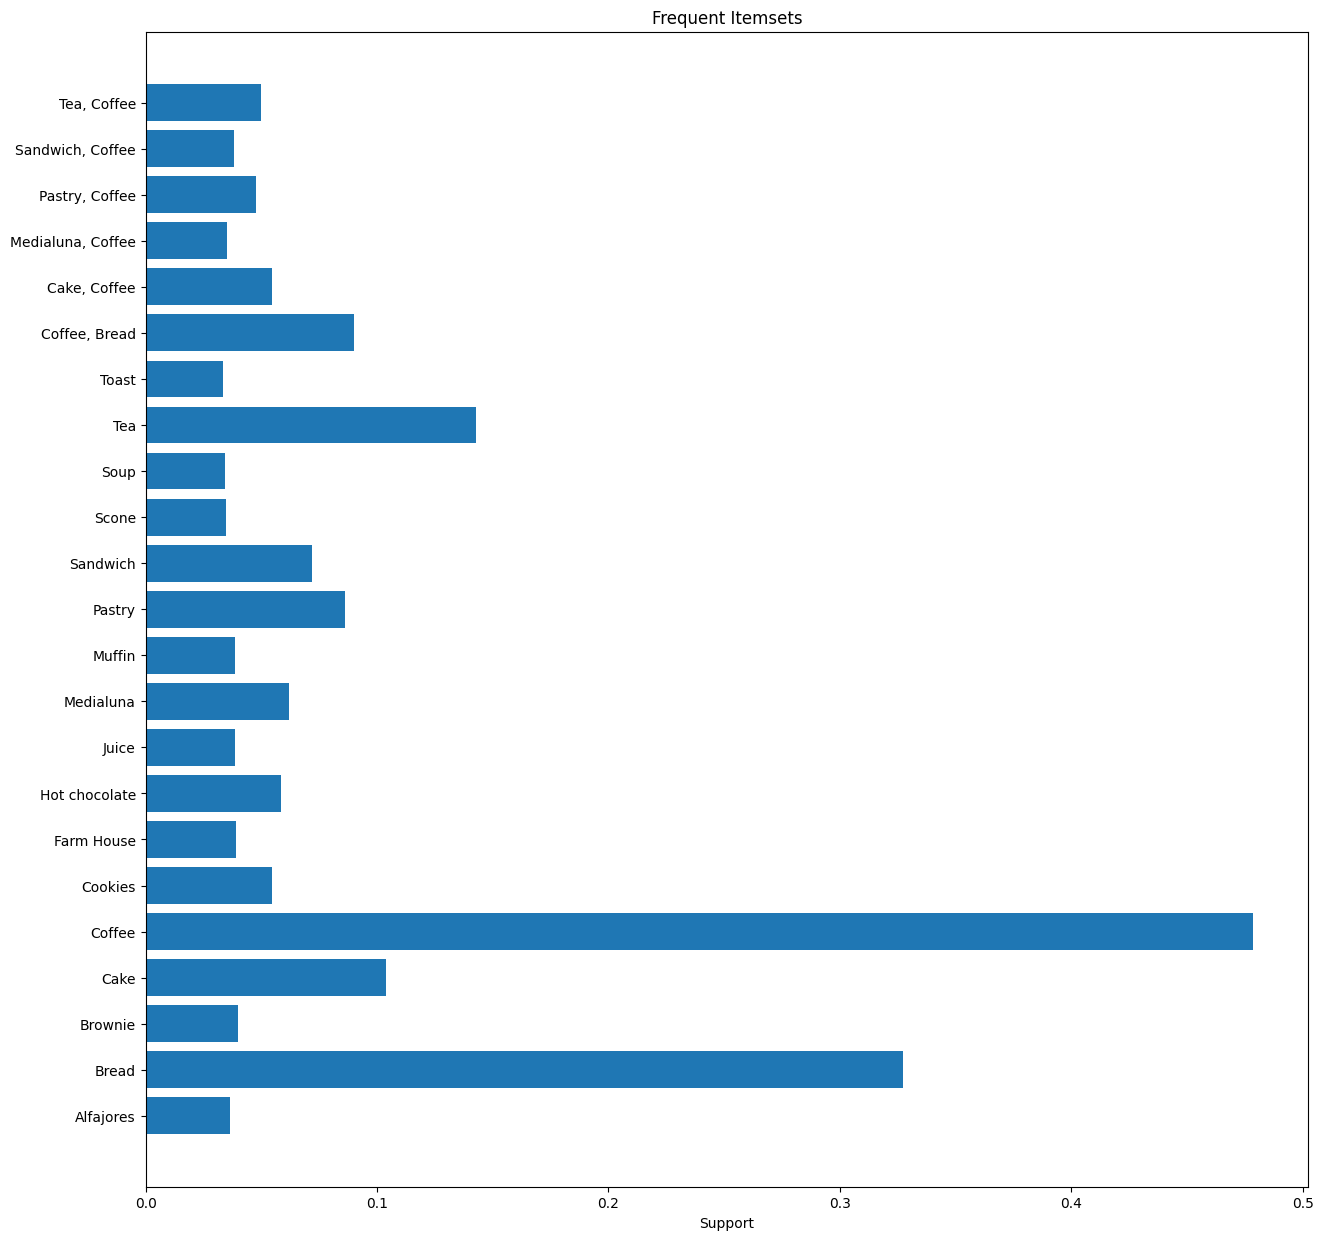

In [20]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()

In [22]:
# Display the frequent itemsets
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
#metric can be set to 'lift' or 'confidence' means the metric to be used for rule evaluation
print("**********Rules**********")
# Display the association rules
print(rules)

     support             itemsets
0   0.036344          (Alfajores)
1   0.327205              (Bread)
2   0.040042            (Brownie)
3   0.103856               (Cake)
4   0.478394             (Coffee)
5   0.054411            (Cookies)
6   0.039197         (Farm House)
7   0.058320      (Hot chocolate)
8   0.038563              (Juice)
9   0.061807          (Medialuna)
10  0.038457             (Muffin)
11  0.086107             (Pastry)
12  0.071844           (Sandwich)
13  0.034548              (Scone)
14  0.034443               (Soup)
15  0.142631                (Tea)
16  0.033597              (Toast)
17  0.090016      (Coffee, Bread)
18  0.054728       (Cake, Coffee)
19  0.035182  (Medialuna, Coffee)
20  0.047544     (Pastry, Coffee)
21  0.038246   (Sandwich, Coffee)
22  0.049868        (Tea, Coffee)
**********Rules**********
   antecedents consequents  antecedent support  consequent support   support  \
0     (Coffee)     (Bread)            0.478394            0.327205  0.090016  